### Open Exploration

The open exploration was done with problem formulation two. The reasoning behind this can be found in the technical report.

In [81]:
#import numpy as np
#import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench import Policy, ema_logging, MultiprocessingEvaluator, save_results, load_results
from problem_formulation import get_model_for_problem_formulation

In [82]:
# choosing the problem formulation
ema_logging.log_to_stderr(ema_logging.INFO)
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [83]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy
for unc in dike_model.uncertainties:
    print(repr(unc))
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

#### Seven policies were chosen to be evaluated in the open exploratio to get a broad overview over the behaviour of the system:
- "BAU": doing nothing
- "RfR": only room for the river
- "Dike": only dike heightening
- "Evacuation": only evacuation
- "FirstDebate": this is based on the outcome of discussions that Rijkswaterstaat had with other actors after the first debate
- "FinalDebate": this policy comprises the aggred upon policy at the end of the final debate

In [84]:
# defining the policies
def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

policies = [
    Policy(
        "BAU",
        **dict(
            get_do_nothing_dict(),
            **{}
        )
    ),
    Policy(
        "RfR",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "1_RfR 0": 1, "2_RfR 0": 1, "3_RfR 0": 1, "4_RfR 0": 1}
        )
    ),
    Policy(
        "Dike",
        **dict(
            get_do_nothing_dict(),
            **{ "A.1_DikeIncrease 0": 10, "A.2_DikeIncrease 0": 10, "A.3_DikeIncrease 0": 10, "A.4_DikeIncrease 0": 10, "A.5_DikeIncrease 0": 10}
        )
    ),
    Policy(
        "Evacuation",
        **dict(
            get_do_nothing_dict(),
            **{ "EWS_DaysToThreat": 4}
        )
    ),
    Policy(
        "FirstDebate", #based on outcome of post-first debate discussion
        **dict(
            get_do_nothing_dict(),
            **{ "0_RfR 0": 1, "A.3_DikeIncrease 0": 10, "3_RfR 0": 1, "A.5_DikeIncrease 0": 10}
        )
    ),
        Policy(
        "FinalDebate", #based on outcome of final debate
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "A.1_DikeIncrease 0": 3, "A.2_DikeIncrease 0": 3,"A.3_DikeIncrease 0": 10, "3_RfR 0": 1, "A.4_DikeIncrease 0": 3, "A.5_DikeIncrease 0": 10}
        )
    ),
]

list_policies = policies

In [85]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 300
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 300 scenarios * 6 policies * 1 model(s) = 1800 experiments
100%|██████████████████████████████████████| 1800/1800 [15:20<00:00,  1.96it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [86]:
# Saving results
experiments, outcomes = results
save_results(results, 'open_exploration/open_exploration_pb2_results.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\aaron\Documents\GitHub\MBDM_Mira\epa1361_group25_2023_open\Final assignment\open_exploration\open_exploration_pb2_results.tar.gz


In [87]:
# Loading results
# Different file than the one saved above to ensure reproducibility (see README)
results = load_results('open_exploration/open_exploration_pb2_results.tar.gz')
experiments, outcomes = results

[MainProcess/INFO] results loaded successfully from C:\Users\aaron\Documents\GitHub\MBDM_Mira\epa1361_group25_2023_open\Final assignment\open_exploration\open_exploration_pb2_results.tar.gz


### Worse case outcomes from the experiments

In [88]:
df_out = pd.DataFrame(outcomes)
for i in range(0,len(list_policies),1):
    print(i+1)
    print('investment cost:',round((df_out.iloc[i*n_scenarios:(i+1)*n_scenarios, 1]+df_out.iloc[i*n_scenarios:(i+1)*n_scenarios, 2]).max(), 0))
    print('economic damage:',round(df_out.iloc[i*n_scenarios:(i+1)*n_scenarios, 0].max(), 0))
    print('total cost:', round((df_out.iloc[i*n_scenarios:(i+1)*n_scenarios, 0]+df_out.iloc[i*n_scenarios:(i+1)*n_scenarios, 1]+df_out.iloc[i*n_scenarios:(i+1)*n_scenarios, 2]+df_out.iloc[i*n_scenarios:(i+1)*n_scenarios, 3]).max(),0))
    print('casualties:', round(df_out.iloc[i*n_scenarios:(i+1)*n_scenarios, 4].max(), 2))

1
investment cost: 0.0
economic damage: 4587111061.0
total cost: 4587111061.0
casualties: 4.0
2
investment cost: 710400000.0
economic damage: 3924600959.0
total cost: 4635000959.0
casualties: 3.47
3
investment cost: 317408714.0
economic damage: 74444338.0
total cost: 391853052.0
casualties: 0.11
4
investment cost: 0.0
economic damage: 4587111061.0
total cost: 4587232053.0
casualties: 0.48
5
investment cost: 308191648.0
economic damage: 2522062810.0
total cost: 2830254458.0
casualties: 1.71
6
investment cost: 406779261.0
economic damage: 1924388658.0
total cost: 2331167919.0
casualties: 1.15


### Visual Correlation and Trade-Off Analysis

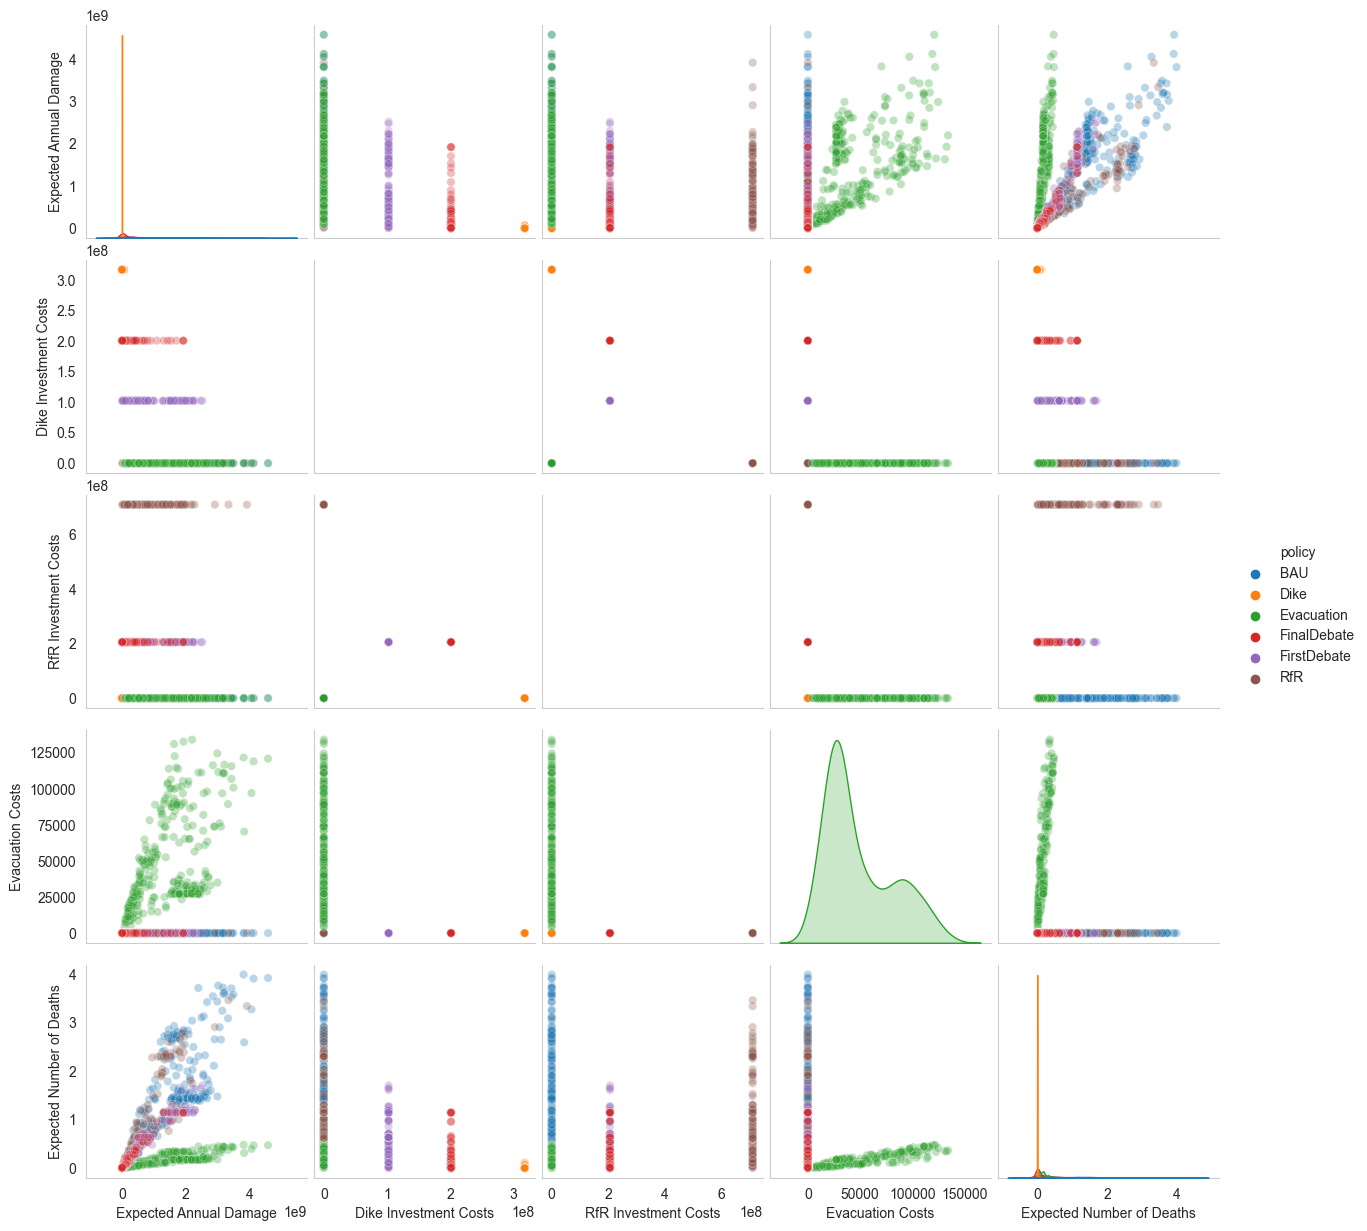

In [89]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), plot_kws={'alpha': 0.3})
sns.set_style("whitegrid", {'axes.grid' : False})
plt.savefig('open_exploration/open_exploration_pb2_outcomes.png', dpi=300)
plt.show()

### Results & Interpretation

- Evacuation limits the expected no. of deaths reliably
- No measure risks high numbers of deaths
- Only expected no. of deaths, evacuation costs and expected annual damage are sensitive to uncertainties
- Evacuation can result in a large range of expected annual damage
- Dike heightening results in lower expected annual damage